In [95]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 7, 5

In [13]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [14]:
layer(np.zeros([10, 5]))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: id=67, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [22]:
layer.variables[0]

<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.12979013,  0.34936082,  0.11743969, -0.36701852, -0.41630742,
        -0.1935587 ,  0.41698426, -0.11632597,  0.5922645 ,  0.08142054],
       [ 0.5635398 ,  0.01603025, -0.09774065,  0.11137617,  0.13131154,
         0.35417205, -0.16789287, -0.2778934 ,  0.39161927, -0.07140529],
       [ 0.44506747, -0.51597047, -0.18949264, -0.05792612,  0.2784546 ,
         0.19722027,  0.5458626 , -0.25213605, -0.04296994,  0.5016801 ],
       [-0.2589909 ,  0.1977722 , -0.29398713, -0.11125237, -0.5226159 ,
        -0.3078582 ,  0.30679727,  0.4924801 ,  0.01447982, -0.00605464],
       [-0.17914036,  0.5834914 ,  0.32613277, -0.36287045, -0.61158794,
         0.2849838 ,  0.49837786, -0.30735773, -0.37366727, -0.5059478 ]],
      dtype=float32)>

In [24]:
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.12979013,  0.34936082,  0.11743969, -0.36701852, -0.41630742,
         -0.1935587 ,  0.41698426, -0.11632597,  0.5922645 ,  0.08142054],
        [ 0.5635398 ,  0.01603025, -0.09774065,  0.11137617,  0.13131154,
          0.35417205, -0.16789287, -0.2778934 ,  0.39161927, -0.07140529],
        [ 0.44506747, -0.51597047, -0.18949264, -0.05792612,  0.2784546 ,
          0.19722027,  0.5458626 , -0.25213605, -0.04296994,  0.5016801 ],
        [-0.2589909 ,  0.1977722 , -0.29398713, -0.11125237, -0.5226159 ,
         -0.3078582 ,  0.30679727,  0.4924801 ,  0.01447982, -0.00605464],
        [-0.17914036,  0.5834914 ,  0.32613277, -0.36287045, -0.61158794,
          0.2849838 ,  0.49837786, -0.30735773, -0.37366727, -0.5059478 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [44]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                        shape=[int(input_shape[-1]),
                                               self.num_outputs])
        self.bias = self.add_variable("bias",
                                      shape=[self.num_outputs])
        
    def call(self, input):
        return tf.add(tf.matmul(input, self.kernel), self.bias)
    
layer = MyDenseLayer(10)

In [45]:
_ = layer(np.zeros([10, 5]))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [57]:
print('Trainable Variables:\n', '\n'.join([var.name for var in layer.trainable_variables]), sep='')

Trainable Variables:
my_dense_layer_7/kernel:0
my_dense_layer_7/bias:0


In [72]:
class ResnetIdentityBlock(keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        
        self.conv2a = layers.Conv2D(filters1, (1, 1))
        self.bn2a = layers.BatchNormalization()
        
        self.conv2b = layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = layers.BatchNormalization()
        
        self.conv2c = layers.Conv2D(filters3, (1, 1))
        self.bn2c = layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)
    
block = ResnetIdentityBlock(1, [1, 2, 3])

In [74]:
_ = block(np.zeros([1, 2, 3, 3]))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [75]:
block.layers

In [77]:
len(block.variables)

18

In [78]:
block.summary()

Model: "resnet_identity_block_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           multiple                  4         
_________________________________________________________________
batch_normalization_12 (Batc multiple                  4         
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  4         
_________________________________________________________________
batch_normalization_13 (Batc multiple                  8         
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                  9         
_________________________________________________________________
batch_normalization_14 (Batc multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
______________________________________________

In [81]:
my_seq = tf.keras.Sequential([
    layers.Conv2D(1, (1, 1),input_shape=(None, None, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(2, 1,padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(3, (1, 1)),
    layers.BatchNormalization()
])

my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: id=2387, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## Linear Regression

In [87]:
## NumPy Implementation
# Input
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([15,32,66,45,90,153,170,200])

# Slope
m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
    
# Bias
b = (np.sum(y) - m *np.sum(x)) / len(x)

print('Slope: {}\n'.format(m), 'Bias: {}\n'.format(b), sep='')

Slope: 27.273809523809526
Bias: -26.35714285714286



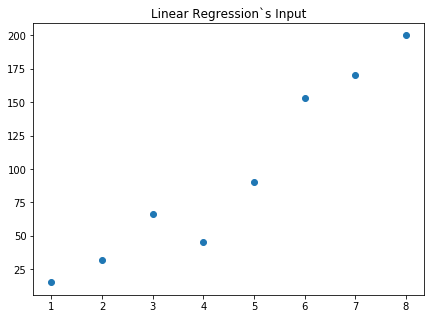

In [96]:
plt.scatter(x, y)
plt.title('Linear Regression`s Input')
sys.stdout.flush()

In [126]:
class LinearRegressionModel(keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__(name='')
        
    def call(self, input_tensor, trainable=False):
        x = input_tensor[:,0].numpy()
        y = input_tensor[:,1].numpy()
        self.slope = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
        self.bias = (np.sum(y) - m *np.sum(x)) / len(x)
        
        return (self.slope, self.bias)
    
LinearRegression = LinearRegressionModel()

In [130]:
data = [[1, 15], [2, 32], [3, 66], [4, 45], [5, 90], [6, 153], [7, 170], [8, 200]]
input_tensor = tf.convert_to_tensor(data, dtype=tf.int32)

In [133]:
m, b = LinearRegression(input_tensor)
print(m, b)

27.273809523809526 -26.35714285714286
